# EDA bank-marketing-campaign-data

## Set up

In [85]:
#!pip install edastatmil_milser
!pip install --upgrade edastatmil_milser
color = "#254025"


In [86]:
from edastatmil_milser import edas_tatmil as EDA

total_data_raw = EDA.pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', delimiter=';')
total_data_raw.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


El dataset tiene 41188 instanias con 21 variables, de estas vamosa a centrarnos en Y que utilizaremos para determinar el exito que ha tenido un apartamento.

## Objetivo

Si el cliente adquiere o no un desposito a largo plazo. Objetivo = y

## Exploración y limpieza superficial

### Dimensiones

In [87]:
total_data_raw.shape


(41188, 21)

El dataset contiene 41188 filas y 21 columnas.
Tenemos 20 caracteristicas y 1 objetivo.

### Variables Nulas

In [88]:
categorical_list, numerical_list = EDA.explore(total_data_raw)


Rows: 41188
Columns: 21
+----------------+----------------+------------+-----------+---------------+
|                | Non-Null Count | Null Count | Data Type | Data Category |
+----------------+----------------+------------+-----------+---------------+
|      age       |     41188      |     0      |   int64   |   Numerical   |
|      job       |     41188      |     0      |  object   |  Categorical  |
|    marital     |     41188      |     0      |  object   |  Categorical  |
|   education    |     41188      |     0      |  object   |  Categorical  |
|    default     |     41188      |     0      |  object   |  Categorical  |
|    housing     |     41188      |     0      |  object   |  Categorical  |
|      loan      |     41188      |     0      |  object   |  Categorical  |
|    contact     |     41188      |     0      |  object   |  Categorical  |
|     month      |     41188      |     0      |  object   |  Categorical  |
|  day_of_week   |     41188      |     0      |  ob

No hay valores nulos, por lo que no desechamos ninguna fila por este motivo.

### Ducpliados
No tenemos identificador, por lo que no podemos eliminar filas por este motivo.
Además cada linea es una solicitud distinta, aunque sea de un mismo cliente

### Caracteristicas sin valor

In [89]:
EDA.Find_over_50_percent_value(total_data_raw)

Columns with values occupying more than 50% of the table:
Column: marital
Value: married, Count: 24928, Percentage: 60.52%

Column: default
Value: no, Count: 32588, Percentage: 79.12%

Column: housing
Value: yes, Count: 21576, Percentage: 52.38%

Column: loan
Value: no, Count: 33950, Percentage: 82.43%

Column: contact
Value: cellular, Count: 26144, Percentage: 63.47%

Column: pdays
Value: 999.0, Count: 39673.0, Percentage: 96.32%

Column: previous
Value: 0.0, Count: 35563.0, Percentage: 86.34%

Column: poutcome
Value: nonexistent, Count: 35563, Percentage: 86.34%

Column: y
Value: no, Count: 36548, Percentage: 88.73%



In [90]:
clean_data = total_data_raw.copy()
clean_data.drop(["pdays","poutcome"], axis = 1, inplace = True)
clean_data.head()
#clean_data['education'].value_counts()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


In [91]:
categorical_list, numerical_list = EDA.explore(clean_data)


Rows: 41188
Columns: 19
+----------------+----------------+------------+-----------+---------------+
|                | Non-Null Count | Null Count | Data Type | Data Category |
+----------------+----------------+------------+-----------+---------------+
|      age       |     41188      |     0      |   int64   |   Numerical   |
|      job       |     41188      |     0      |  object   |  Categorical  |
|    marital     |     41188      |     0      |  object   |  Categorical  |
|   education    |     41188      |     0      |  object   |  Categorical  |
|    default     |     41188      |     0      |  object   |  Categorical  |
|    housing     |     41188      |     0      |  object   |  Categorical  |
|      loan      |     41188      |     0      |  object   |  Categorical  |
|    contact     |     41188      |     0      |  object   |  Categorical  |
|     month      |     41188      |     0      |  object   |  Categorical  |
|  day_of_week   |     41188      |     0      |  ob

### Analysis univariante

#### Categoricas

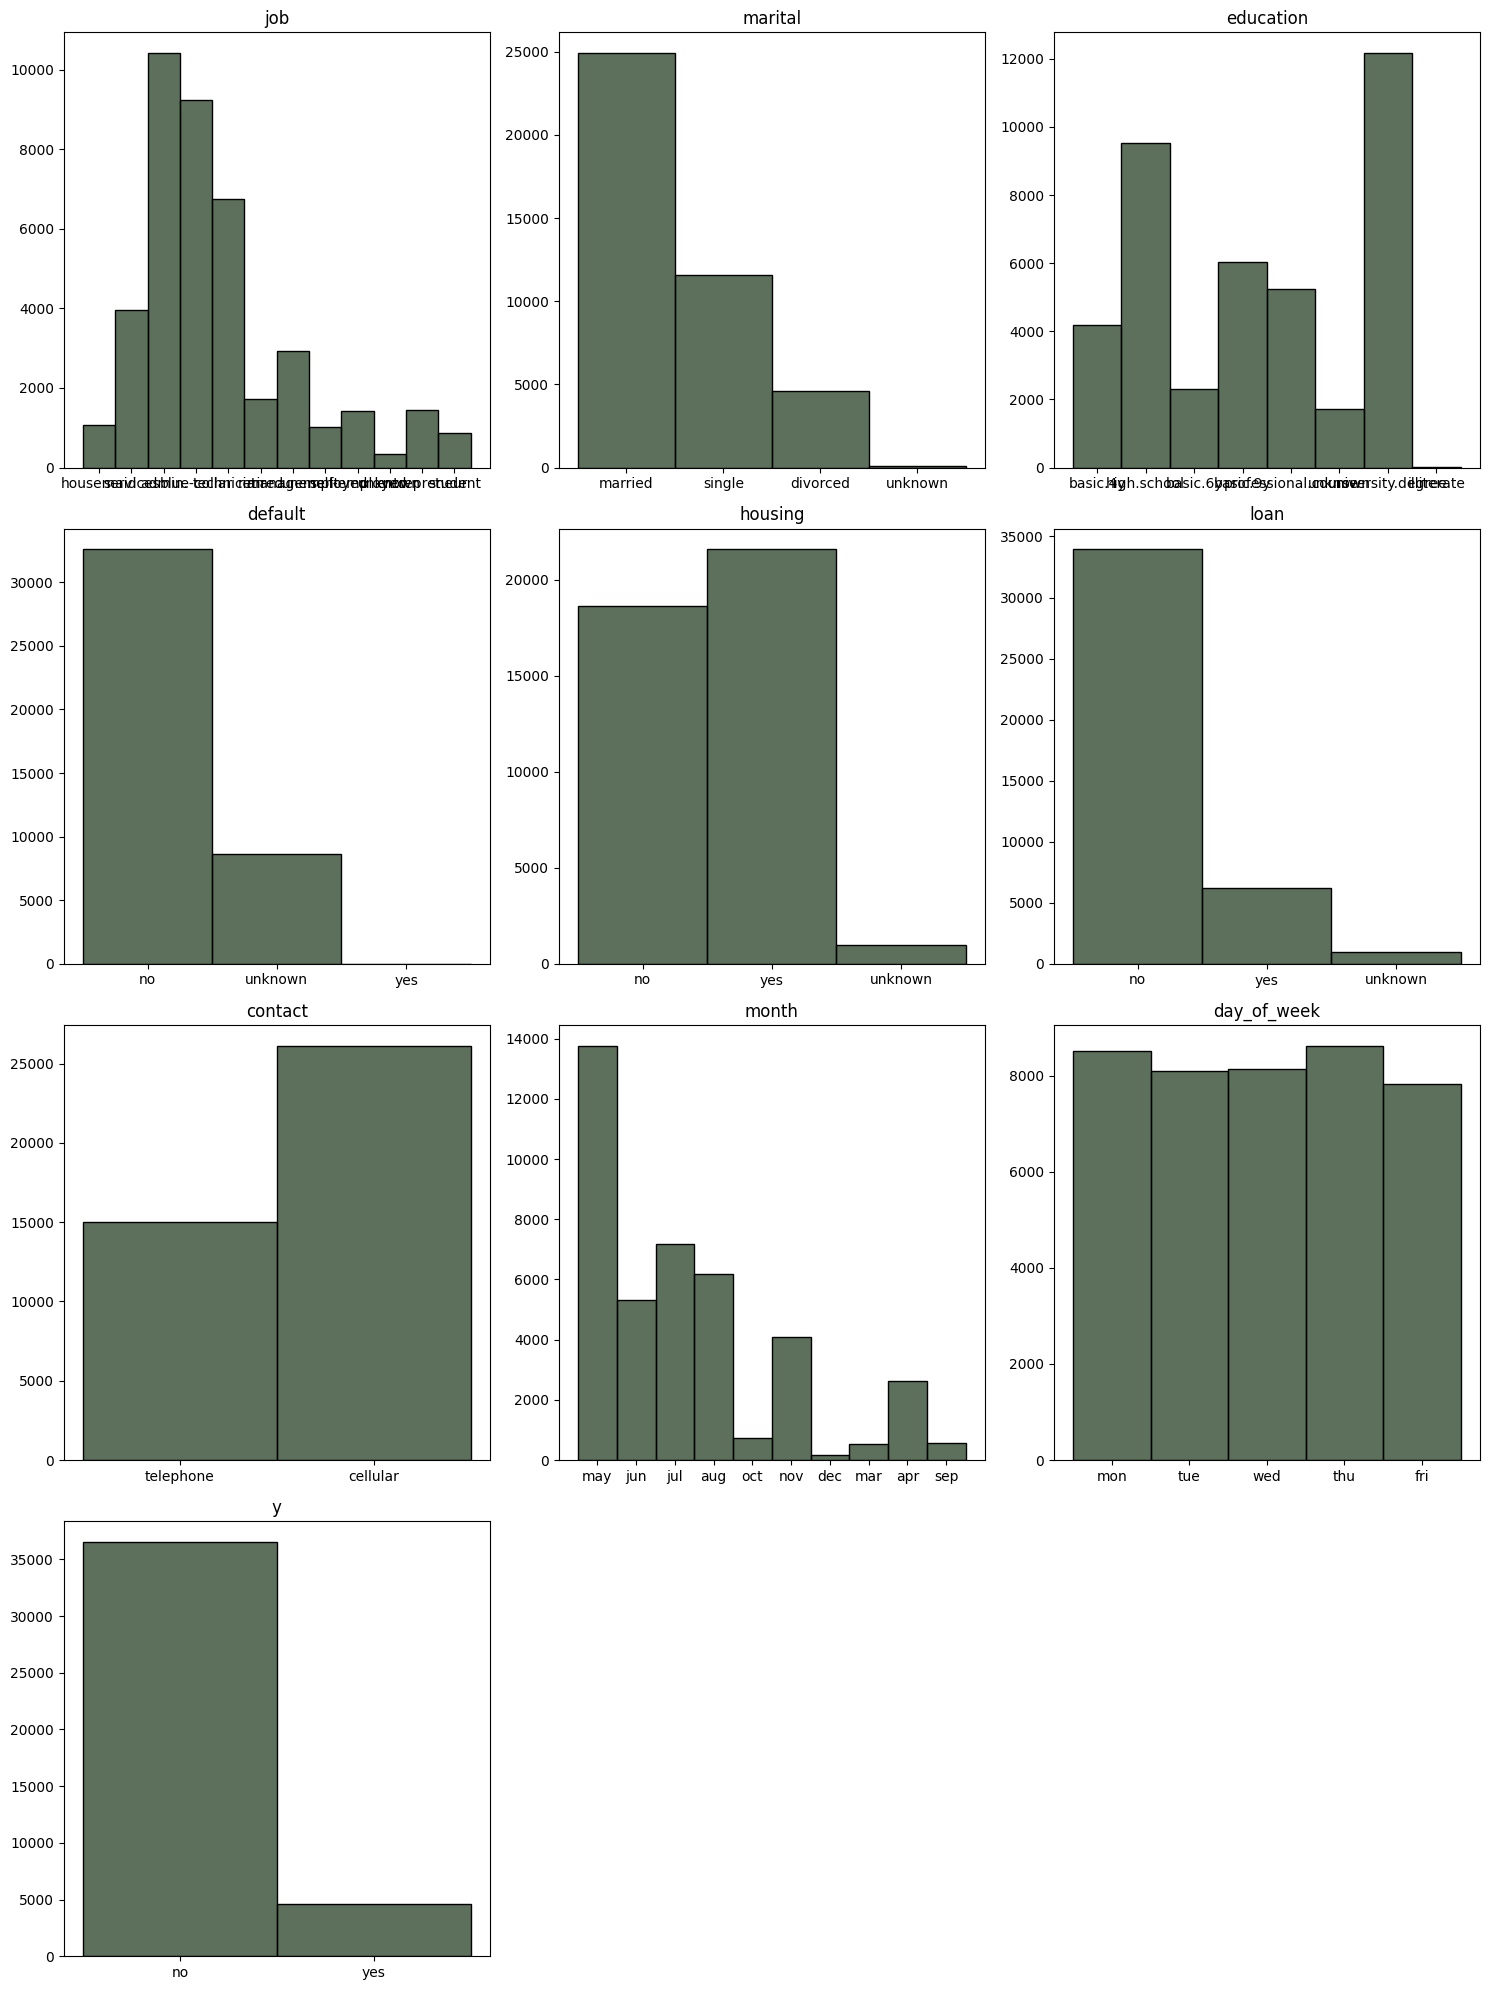

In [92]:
EDA.univariate_hist(categorical_list,clean_data,color=color)

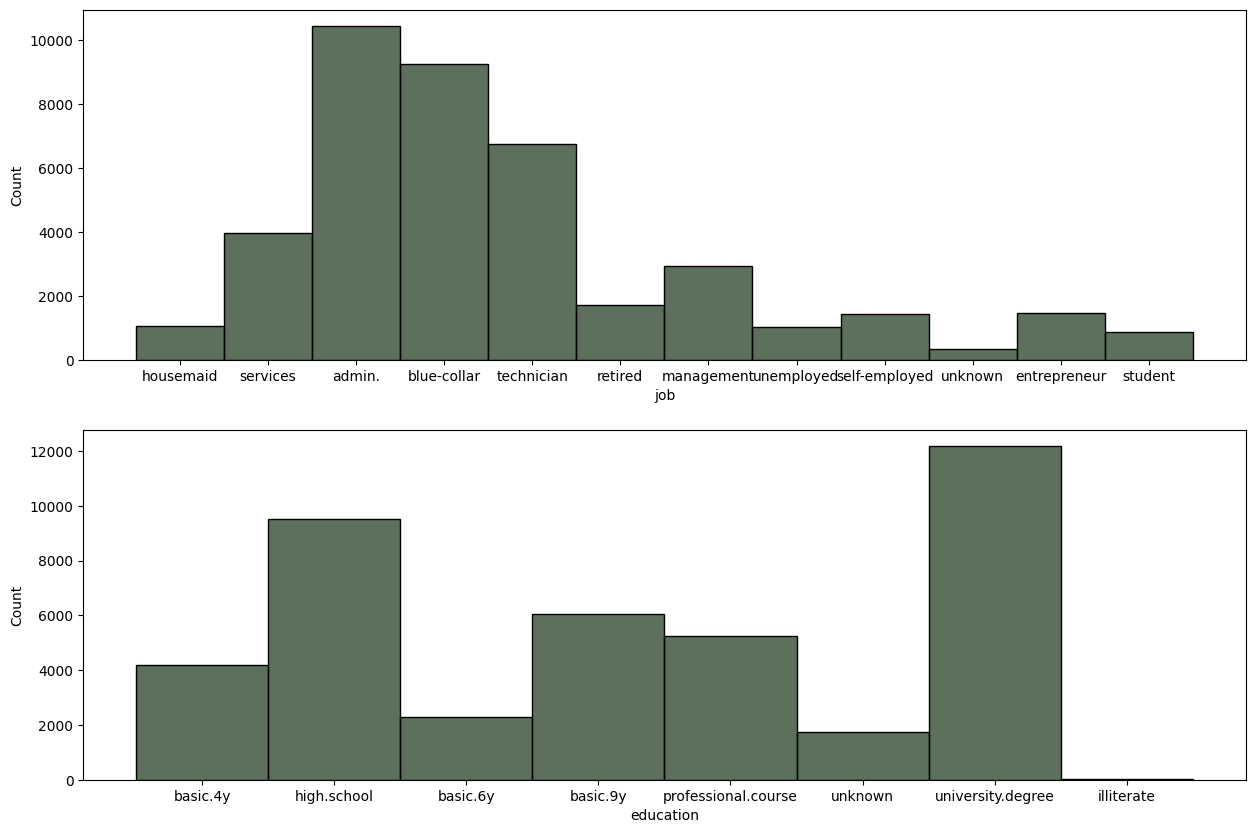

In [93]:

fig, axis = EDA.plt.subplots(2,1, figsize = (15, 10))

EDA.sns.histplot(clean_data, x = "job", ax = axis[0],color= color)
EDA.sns.histplot(clean_data, x = "education", ax = axis[1],color= color)


EDA.plt.show()

The majority of contacts are made in the month of May, and contacts are equally distributed across any weekday.
The mos common jobs that are being target are admini., blue-collar and technician

##### Graficos Numericos


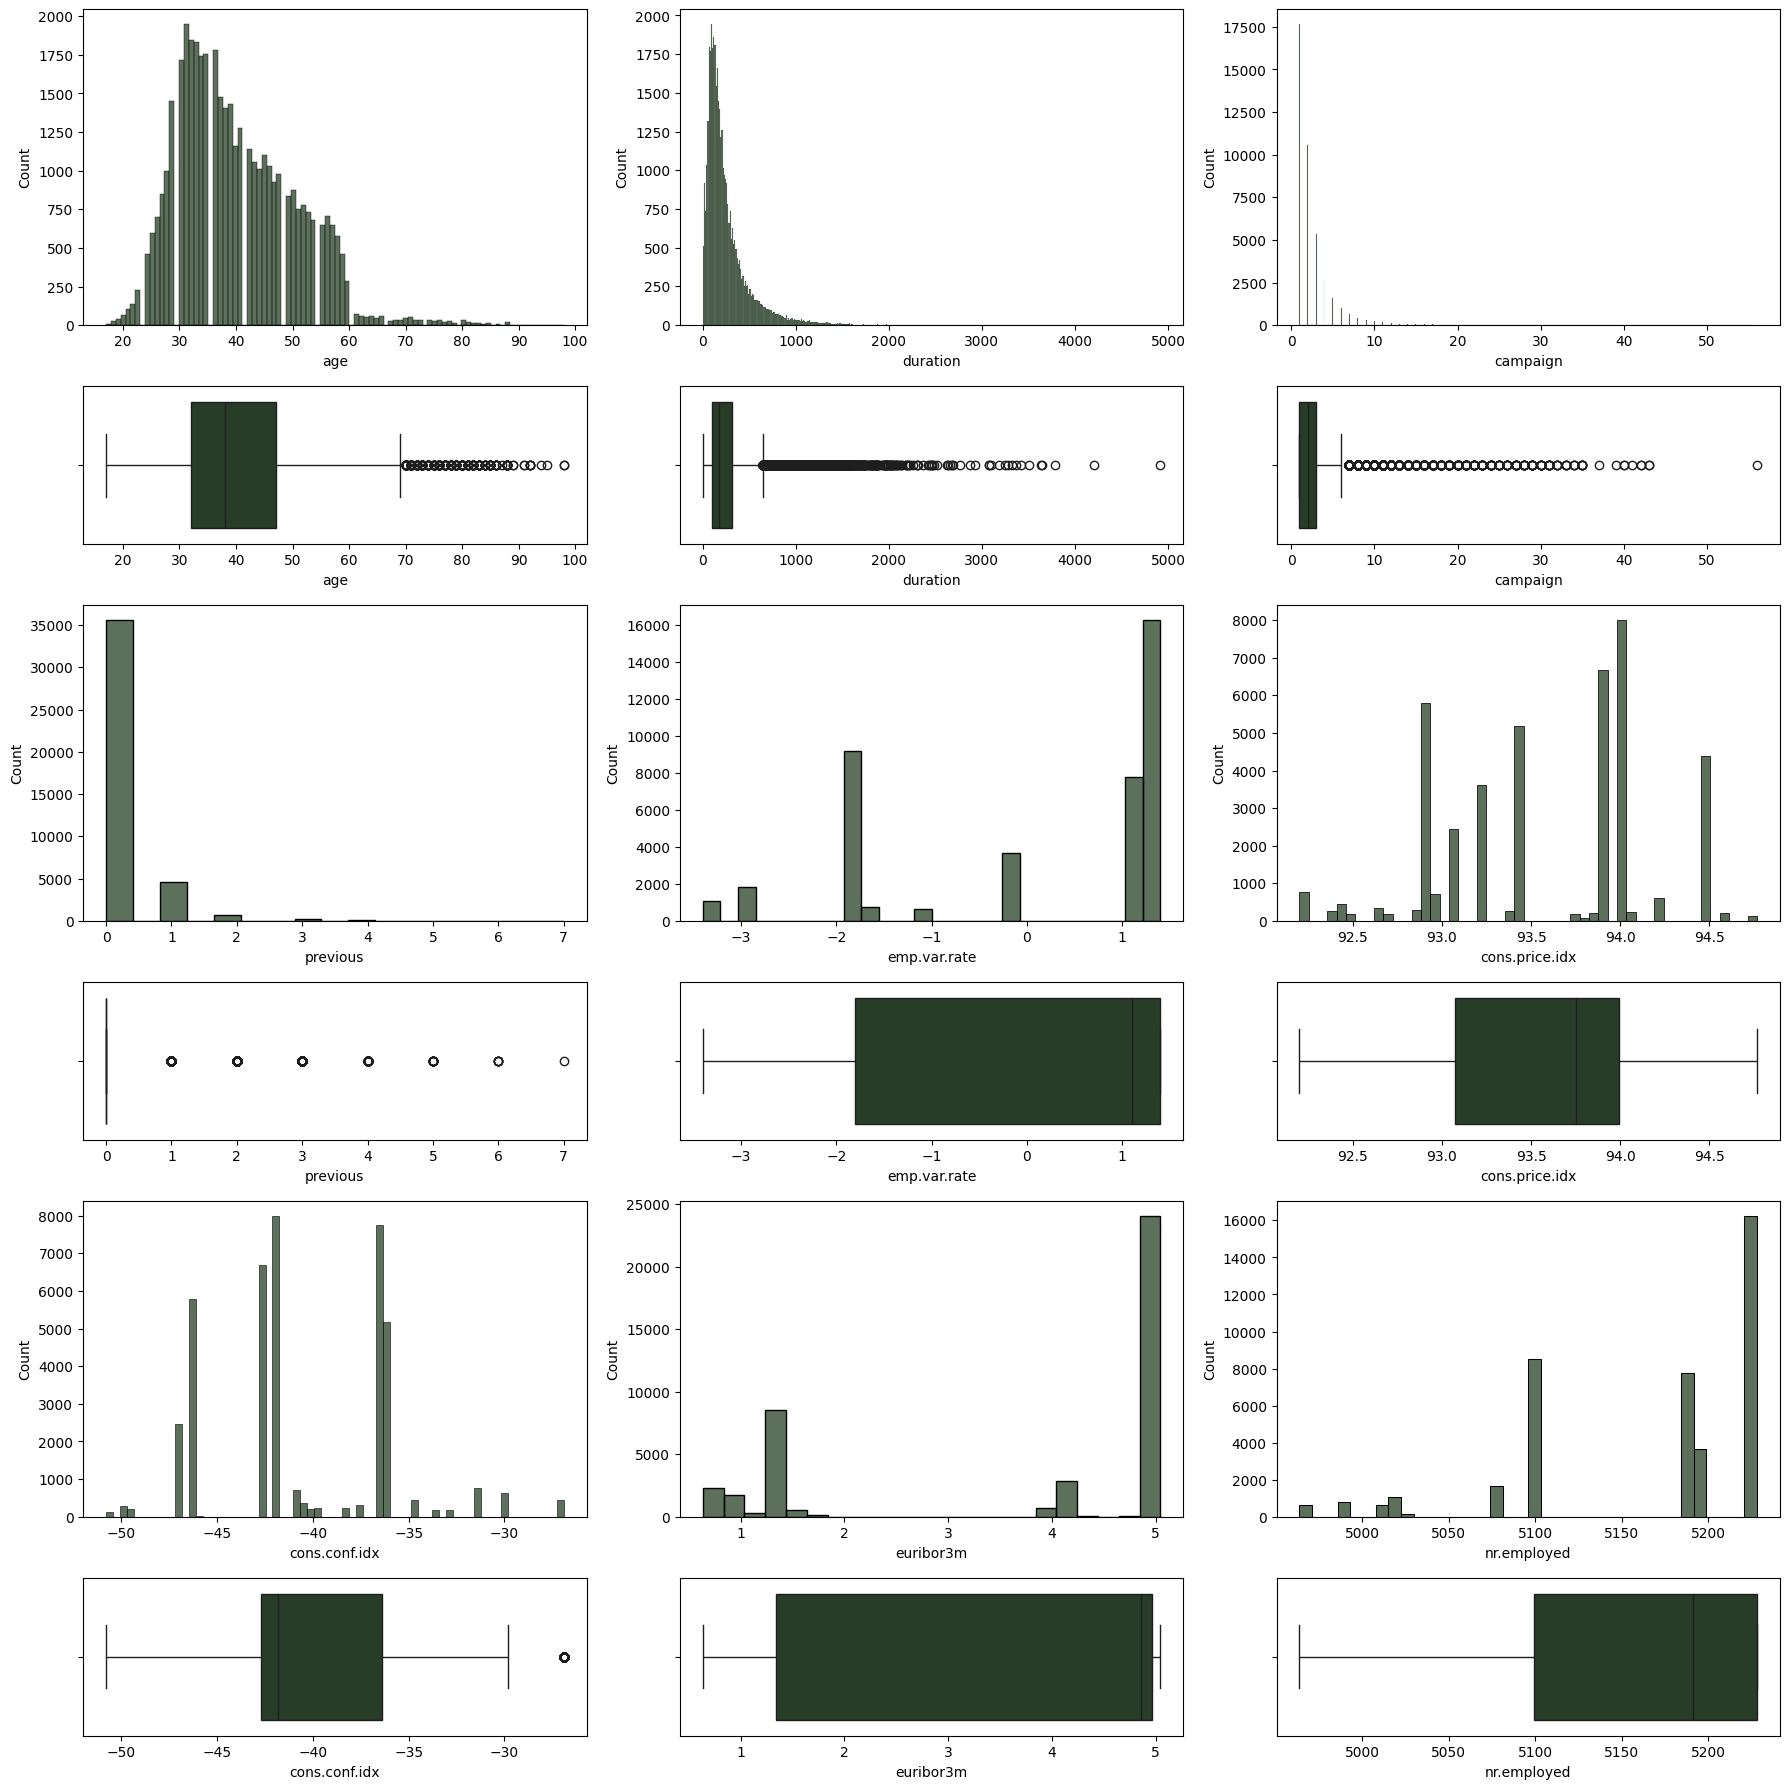

In [94]:
EDA.univariate_histbox(numerical_list, clean_data,color= color)


### Analisis multivariante

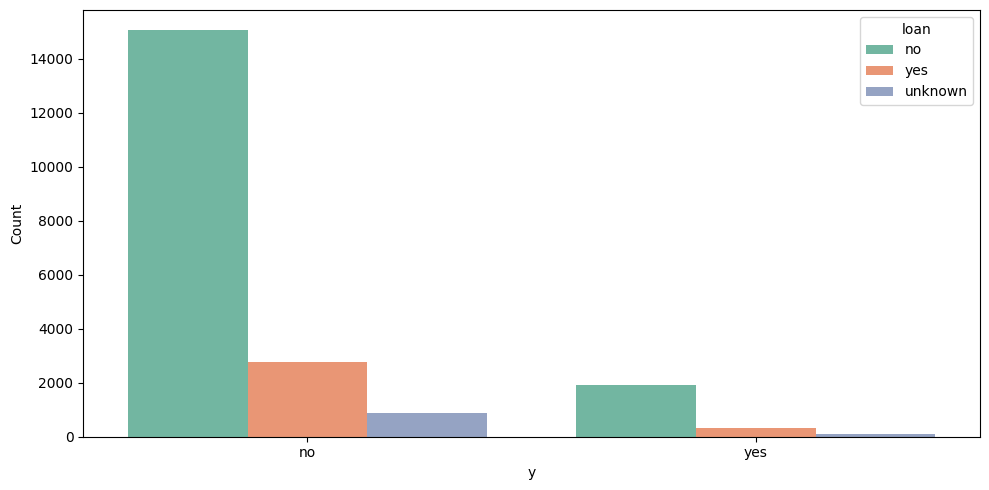

In [95]:

variable_lists=[['y','housing','loan']]
EDA.multivariate_barplots(clean_data, variable_lists,y='count')


AS we see it is not realy relevent wether a client has or not a previous loan

---------------------------------

In [96]:
clean_data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [97]:
factorized_data = EDA.factorize_categorical(clean_data,categorical_list)

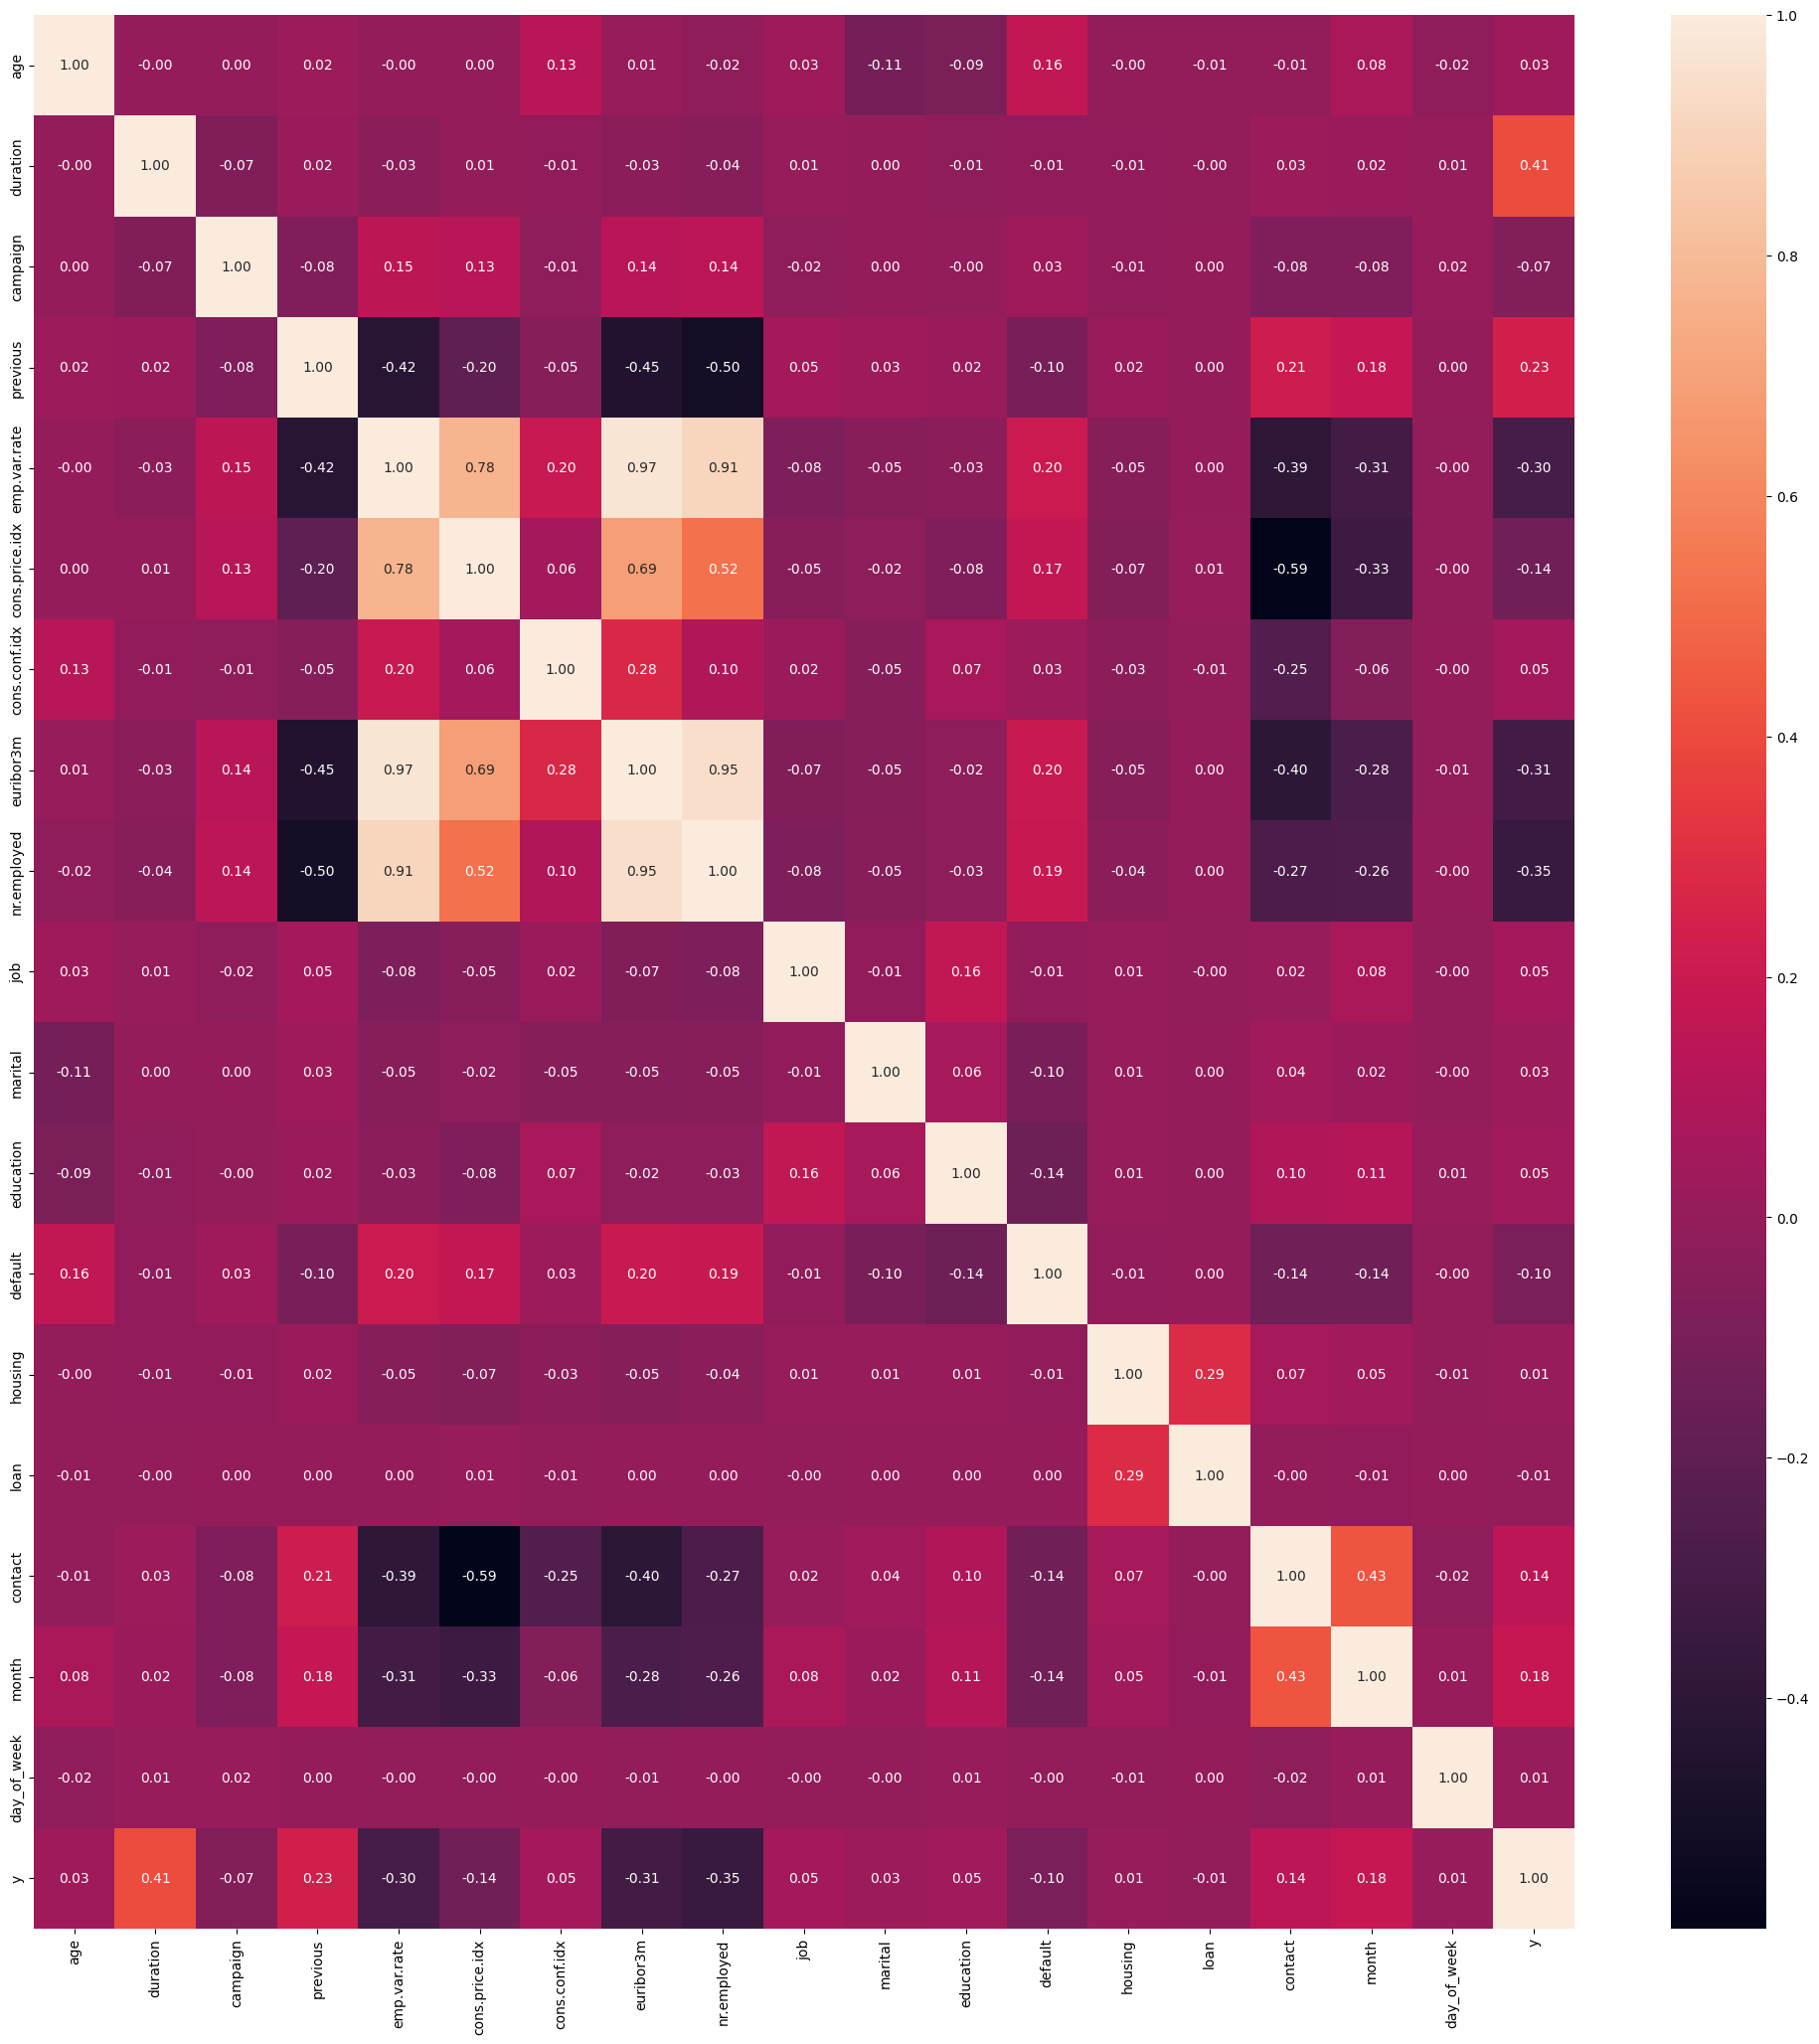

In [98]:
factorized_list = numerical_list+categorical_list
EDA.plt.subplots(figsize = (25, 25))
_ = EDA.sns.heatmap(factorized_data[factorized_list].corr(), annot = True, fmt = ".2f")


Duration: The variable "duration" has a significant positive correlation with "y." This suggests that the longer a phone call lasts (greater duration), the more likely the customer is to subscribe (value "yes" in "y").

Previous:     The correlation with "y" is moderate and negative. This means that a higher number of previous contacts with the customer tends to decrease the probability of them subscribing.

Emp.var.rate: The correlation with "y" is negative. When the employment variation rate is high (indicating a declining economy), customers are less likely to subscribe.
Euribor3m:    The correlation with "y" is negative. A higher Euribor rate (higher interest rates) is associated with a lower subscription probability.

Cons.con.idx: The correlation with "y" is also negative. A lower consumer confidence index is associated with a lower subscription probability.

Number of employees: The correlation with "y" is negative. A higher number of employees in the economy is related to a lower subscription probability.

Interestingly, we can see how emp.var.rate and euribor3m have almost identical influence on the other parameters.

### DAY 2

Before doing the outlayers treatmen we are goint to save a gourp of datasets with the actual `factorized_data`

In [99]:
factorized_data.to_csv('../data/processed/factorized_data.csv')
predictors = factorized_list[:-1]
target = 'y'
data_outlayers_dict = EDA.splitter('../data/processed/',predictors,target)


#### Outlayers

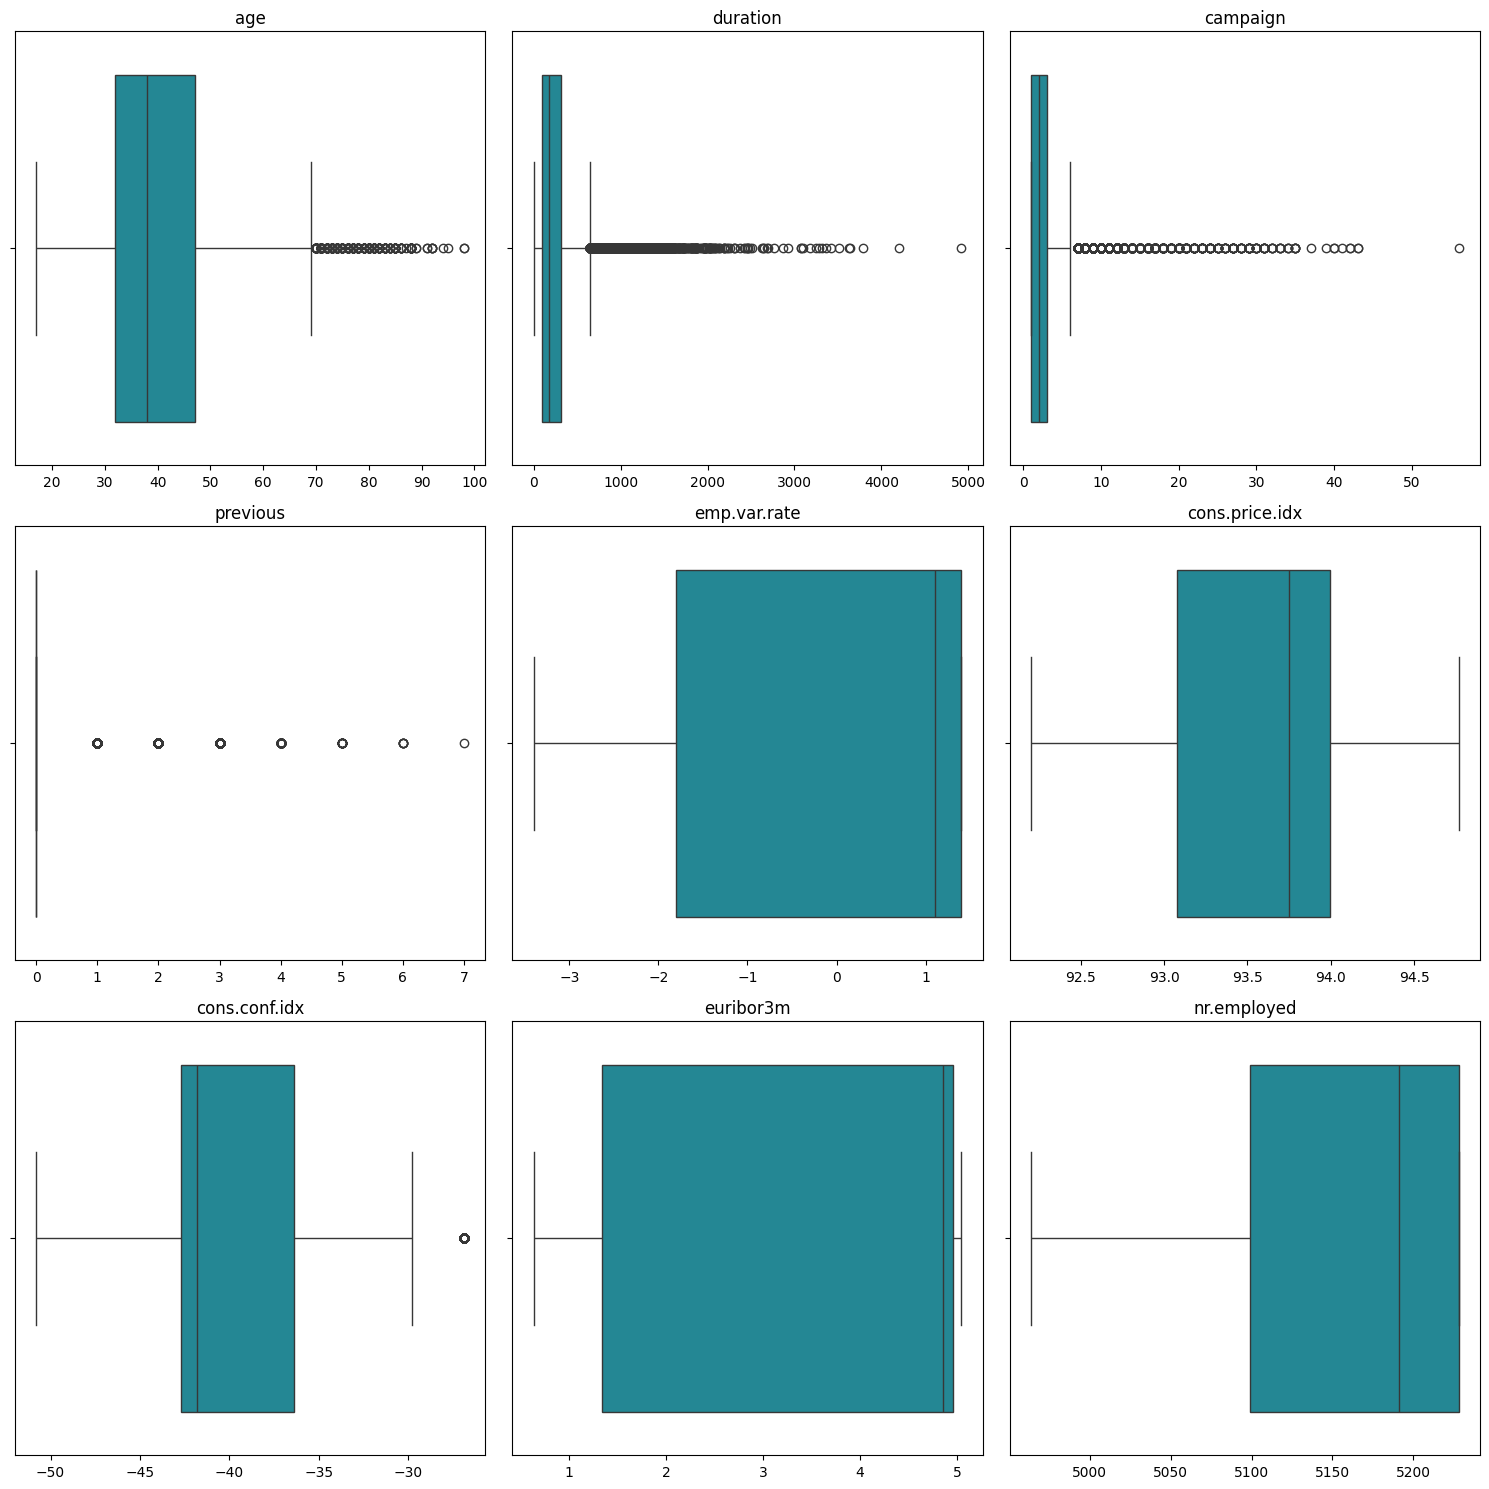

In [100]:
#factorized_list[:-1]
#EDA.explore(total_data_raw)
EDA.numerical_box(numerical_list, factorized_data)

Reemplazo las que tienen contenidos fuera de sus medias y les meto la moda para que no afecten 

In [101]:
from edastatmil_milser.edas_tatmil import Do_enum
outliers, cleaned_df = EDA.outliers_iqr(factorized_data,'age',1,Do=Do_enum.NOTHING)



62.0 17.0
837 outliers have been found


In [102]:
import numpy as np
cleaned_df["age"] = np.where(cleaned_df["age"] > 62, 62.0, cleaned_df["age"])



In [103]:
outliers, cleaned_df = EDA.outliers_iqr(cleaned_df,'cons.conf.idx',1,Do=Do_enum.NOTHING)

-30.099999999999994 -49.00000000000001
1328 outliers have been found


In [104]:
import numpy as np
cleaned_df["cons.conf.idx"] = np.where(cleaned_df["cons.conf.idx"] > 30.099999999999994, 30.099999999999994, cleaned_df["cons.conf.idx"])

In [105]:
outliers, cleaned_df = EDA.outliers_iqr(cleaned_df,'duration',1,Do=Do_enum.NOTHING)
outliers, cleaned_df = EDA.outliers_iqr(cleaned_df,'campaign',1,Do=Do_enum.NOTHING)

536.0 -115.0
4340 outliers have been found
5.0 -1.0
4984 outliers have been found


In [106]:
outliers, cleaned_df = EDA.outliers_iqr(cleaned_df,'previous',1,Do=Do_enum.MODE)


0.0 0.0
41188 outliers have been treated by replacing them with the mode


Now we save the data without outliers

In [107]:
factorized_data.to_csv('../data/processed/factorized_NoOutliers_data.csv')
predictors = factorized_list[:-1]
target = 'y'
data_dict = EDA.splitter('../data/processed/',predictors,target)

##### Mantener

Normalizadas

In [108]:
predictors = factorized_list[:-1]
data_norm_dict = EDA.normalize('../data/processed/SplitData/',predictors,scaler='StandardScaler')

### Day 3

mutual_info_classif en lugar de el anove si las variables son categoricas.

In [109]:
data_dict.keys()


dict_keys(['factorized_data_Xtrain', 'factorized_data_Xtest', 'factorized_data_ytrain', 'factorized_data_ytest', 'factorized_NoOutliers_data_Xtrain', 'factorized_NoOutliers_data_Xtest', 'factorized_NoOutliers_data_ytrain', 'factorized_NoOutliers_data_ytest'])

We use mutual_info_classif instead of mutual_info_regression becouse the parameters are related.

In [118]:
k=10
factorized_FSelect_data,factorized_FSelect_data_keys = EDA.feature_sel(data_dict['factorized_data_Xtrain'],data_dict['factorized_data_ytrain'],k=k,file_name='factorized_data', method='SelectKBest', test='mutual_info_classif')
factorized_NoOutliers_data_data,factorized_NoOutliers_data_data_keys = EDA.feature_sel(data_dict['factorized_NoOutliers_data_Xtrain'],data_dict['factorized_NoOutliers_data_ytrain'],k=k,file_name='factorized_NoOutliers', method='SelectKBest', test='mutual_info_classif')
factorized_FSelect_data_norm,factorized_FSelect_data_keys_norm = EDA.feature_sel(data_norm_dict['factorized_data_Xtrain_norm'],data_dict['factorized_data_ytrain'],k=k,file_name='factorized_data_norm', method='SelectKBest', test='mutual_info_classif')
factorized_NoOutliers_data_data_norm,factorized_NoOutliers_data_data_keys_norm = EDA.feature_sel(data_norm_dict['factorized_NoOutliers_data_Xtrain_norm'],data_dict['factorized_NoOutliers_data_ytrain'],k=k,file_name='factorized_NoOutliers_norm', method='SelectKBest', test='mutual_info_classif')

In [119]:
feature_data_selection = [
    ("factorized_FSelect_data_keys", factorized_FSelect_data_keys),
    ("factorized_NoOutliers_data_data_keys", factorized_NoOutliers_data_data_keys),
    ("factorized_FSelect_data_keys_norm", factorized_FSelect_data_keys_norm),
    ("factorized_NoOutliers_data_data_keys_norm", factorized_NoOutliers_data_data_keys_norm)
]
aux_dict = {key: value for key, value in feature_data_selection}
df_feature_data_selection = EDA.pd.DataFrame(aux_dict)

df_feature_data_selection_tp = df_feature_data_selection.transpose()
df_feature_data_selection_tp


,0,1,2,3,4,5,6,7,8,9
factorized_FSelect_data_keys,age,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,month
factorized_NoOutliers_data_data_keys,age,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,month
factorized_FSelect_data_keys_norm,age,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,month
factorized_NoOutliers_data_data_keys_norm,age,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact,month


We can see that regardless of the dataset used, it is clear which columns are the most important for this dataset, as there is no difference between them.

________________________________________

### Optimizacion --> not here

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(factorized_FSelect_data,data_dict['factorized_data_ytrain'])

LogisticRegression(max_iter=5000)

In [57]:
y_train_pred = model.predict(factorized_FSelect_data)


In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(data_dict['factorized_data_ytrain'], y_train_pred)

0.9051715167701433

grid


In [53]:
hyperp_dict = {
    "penalty": [None, 'l2', 'l1', 'elasticnet'],
    "dual": [True, False],
    "C": [0.001, 0.01, 0.1],
    "fit_intercept": [True, False],
    "max_iter": [1,5,10, 100],
    "n_jobs": [-1]  # Utiliza todos los núcleos de la CPU
}

hyperp_dict2 = {
    "n_jobs": [-1],
    "penalty": [None, 'l2', 'l1', 'elasticnet'],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "max_iter": [1, 5, 10, 50, 100],
    "C": [0.001, 0.01, 0.1],
    "solver": ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    "tol": [1e-4, 1e-3, 1e-2],
    "class_weight": [None, 'balanced'],
    "verbose": [0, 1, 2],
    "warm_start": [True, False],
    "l1_ratio": [None, 0.1, 0.5, 0.9],
    "random_state": [None, 42, 100],
    "shuffle": [True, False],
    "early_stopping": [True, False],
    "validation_fraction": [0.1, 0.2, 0.3],
    "multi_class": ['auto', 'ovr', 'multinomial'],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperp_dict, scoring = "accuracy", cv = 10)
grid2 = GridSearchCV(model, hyperp_dict2, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1, 5, 10, 100], 'n_jobs': [-1],
                         'penalty': [None, 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [54]:
grid.fit(factorized_FSelect_data, data_dict['factorized_data_ytrain'])

c:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1, 5, 10, 100], 'n_jobs': [-1],
                         'penalty': [None, 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [56]:
grid.best_estimator_

LogisticRegression(C=0.01, fit_intercept=False, n_jobs=-1)

In [57]:
grid.best_params_

{'C': 0.01,
 'dual': False,
 'fit_intercept': False,
 'max_iter': 100,
 'n_jobs': -1,
 'penalty': 'l2'}

In [62]:
accuracy_score(data_dict['factorized_data_ytrain'], LogisticRegression(C=0.01, max_iter=200, n_jobs=-1, penalty='l2',fit_intercept=False,dual=False).fit(factorized_FSelect_data, data_dict['factorized_data_ytrain']).predict(factorized_FSelect_data))

0.9028823141757136

In [63]:
accuracy_score(data_dict['factorized_data_ytrain'], LogisticRegression(max_iter=10).fit(factorized_FSelect_data, data_dict['factorized_data_ytrain']).predict(factorized_FSelect_data))

c:\Users\milser\Documents\Trasteo_4geeks\Logistic-Regression-Project-Tutorial\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8928236967153411

In [64]:
y_train_pred = grid.best_estimator_.predict(factorized_FSelect_data)
accuracy_score(data_dict['factorized_data_ytrain'], y_train_pred)

0.9009052755714335